<font size=6>**优化算法**</font>
# Mini-batch梯度下降
机器学习是一个不断"idea-code-experiment"的过程.这种情况下,算法训练优化的速度显得格外重要,只有速度允许的情况下,我们才能在不长的时间内,迭代尝试不同的idea,进而找到合适的模型.这里讲到的优化算法能够帮助我们快速训练模型.
    
深度学习在大数据领域能够更好的发挥应有的效果,但是大量的数据必然会降低模型的训练速度.而Mini-batch是这个问题的一个比较有效的解决方式.

## **向量化回顾:**

$X= \lbrack x^{(1)}\ x^{(2)}\ x^{(3)}\ldots\ldots x^{(m)}\rbrack$

$Y= \lbrack y^{(1)}\ y^{(2)}\ y^{(3)}\ldots \ldots y^{(m)}\rbrack$

$X$的维数是$(n_{x},m)$，$Y$的维数是$(1,m)$

## **Mini-batch:**

$\large X^{\{t\}}=\lbrack x^{(nt+1)}\dots x^{(n(t+1))}\rbrack$

$\large Y^{\{t\}}=\lbrack y^{(nt+1)}\dots y^{(n(t+1))}\rbrack$

相对于mini-batch,我们称全样本参与依次梯度下降为batch,相应的另一个mini-batch的特例是每个mini-batch只有一个样本.
<img src="images/ddcd8d751da71bdf4a9aa71f0244c5f2.png" width=50%>
## epoch-迭代轮数
```python
for i in range(epoch_num):
    for j in range(batch_t):
        ...
```
<img src="images/4be84da3e15341062f3a68d9f8f447c5.png" width=50%>

# 理解mini-batch梯度下降法
## **batch与mini-batch的成本值$J$的走势差异**
<img src="images/b5c07d7dec7e54bed73cdcd43e79452d.png">

1. batch梯度下降,成本值$J$基本上是单调递减的走势.
2. mini-batch,成本值$J^{\{t\}}$总体呈递减的走势,但是局部存在上下震荡的现象.

<img src="images/6ffa1351889a85cb5247fc7c43555959.png">

## **mini-batch的两种极端:**
1. 如果mini-batch的批次容量$n$为整体样本集$m$,那么mini-batch就变成了batch梯度下降;
2. 如果mini-batch的批次容量$n$为$1$,这种情况称为随机梯度下降法,mini-batch每次针对一个样本进行梯度下降;

## mini-batch应该如何选择批次容量值?
1. 如果训练集数据量$m$比较小(小于2000个样本),直接采用batch梯度下降法即可;
2. 否则,mini-batch的批次容量值,推荐设置为64到512等$(2^i,i\in\mathbb{Z})$;
3. mini-batch批次容量值的设定需要考虑内容的实际情况;

# 指数加权平均数
1. 简单移动平均:$\large v_t=\frac{1}{n}\sum_{(i=t-n+1)}^{t}{\theta_i}$
2. 指数加权平均:$\large v_t=\beta v_{(t-1)}+(1-\beta)\theta_t,\beta\in(0,1),t>1,v_1=\theta_1$
<img src="images/a3b26bbce9cd3d0decba5aa8b26af035.png">

**移动平均:**
1. 平滑趋势,减少异常;
2. 降低灵敏度;

**加权移动较简单移动:**
1. 需要较少的内存空间;
2. 需要对第一个值特殊处理;

# momentum-动量梯度下降法
动量梯度下降法,又叫做momentum,运行速度几乎总是快于标准的梯度下降法,基本思想就是就算梯度的指数加权平均数

**原理:**
<img src="images/cc2d415b8ccda9fdaba12c575d4d3c4b.png">
1. momentum保留下降方向的趋势速度,非下降方向经平均之后值变小;


**公式:**
<img src="images/a3af0fb5e49e16c108e72d015ef0fdb6.png">


# RMSprop
RMSprop,全称是root mean square prop,即均方根传播算法.

**原理:**
<img src="images/cc2d415b8ccda9fdaba12c575d4d3c4b.png">

**公式:**

$S_{dW}= \beta S_{dW} + (1 -\beta) {(dW)}^{2}$

$S_{db}= \beta S_{db} + (1 - \beta){(db)}^{2}$

$W:= W -a\frac{dW}{\sqrt{S_{dW}}}$

$b:=b -\alpha\frac{db}{\sqrt{S_{db}}}$

# Adam
**Adam**优化算法基本上就是将**Momentum**和**RMSprop**结合在一起,全称为Adaptive Moment Estimation,即自适应动量估计算法.

**公式:**

$v_{dW}= \beta_1 v_{dW} + (1 -\beta_1) {(dW)},v_{db}= \beta_1 v_{db} + (1 -\beta_1) {(db)}$

$S_{dW}= \beta_2 S_{dW} + (1 -\beta_2) {(dW)}^{2},S_{db}= \beta_2 S_{db} + (1 - \beta_2){(db)}^{2}$

$W:= W -a\frac{v_{dW}}{\sqrt{S_{dW}+\epsilon}}$

$b:=b -\alpha\frac{v_{db}}{\sqrt{S_{db}+\epsilon}}$

**超参数,推荐配置:**
1. $\beta_1=0.9$;
2. $\beta_2=0.999$;
3. $\epsilon=10^{-8}$;

# 学习率衰减
**学习率衰减的优势:**
<img src="images/095feaa609b0029d6abc5c74ef7b3b35.png">

**实现:**

mini-batch中迭代轮数增加,学习率衰减.
```python
for i in range(epoch):
    a:=a-x
    ...
```

**学习率衰减的方法:**
1. $\large\alpha:=\frac{1}{1+epoch\_num*decay\_rate}\alpha_0$;
2. $\large\alpha:=\gamma^{epoch\_num}\alpha_0,\gamma\in(0,1)$;
3. $\large\alpha:=\frac{k}{\sqrt{epoch\_num}}\alpha_0,或者\alpha:=\frac{k}{\sqrt{t}}\alpha_0$
4. $\large\alpha:=\frac{1}{2^{epoch\_num}}\alpha_0$
5. 手动设置

# 优化算法-练习
接下来我们来练习使用本节学到的优化算法来提高模型学习速度和效果.
## 环境准备

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import math
import sklearn
import sklearn.datasets

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

## 梯度下降
机器学习中一个简单而又重要的方法是梯度下降.当我们一次迭代梯度下降利用所有样本的时候,称之为批处理梯度下降,也是mini-batch的一种特殊形式.

**公式:**
$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{1}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{2}$$

In [2]:
def update_parameters_with_gd(parameters, grads, learning_rate):
    L = len(parameters) // 2
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] -learning_rate*grads["db" + str(l+1)]        
    return parameters

梯度下降的一个变体是随机梯度下降(SGD),相当于mini-batch梯度下降时批次容量为一个样本的特例.

- **梯度下降-Batch**:
``` python
X = data_input
Y = labels
parameters = initialize_parameters(layers_dims)
for i in range(0, num_iterations):
    a, caches = forward_propagation(X, parameters)
    cost = compute_cost(a, Y)
    grads = backward_propagation(a, caches, parameters)
    parameters = update_parameters(parameters, grads)    
```

- **随机梯度下降-SGD-Stochastic Gradient Descent**:
```python
X = data_input
Y = labels
parameters = initialize_parameters(layers_dims)
for i in range(0, num_iterations):
    for j in range(0, m):
        a, caches = forward_propagation(X[:,j], parameters)
        cost = compute_cost(a, Y[:,j])
        grads = backward_propagation(a, caches, parameters)
        parameters = update_parameters(parameters, grads)
```

**梯度下降走势对比:**
<img src="images/b546825d9b3cd39c791899d67fdc4cfd.png" style="width:750px;height:250px;">

**小结:**
1. batch,mini-batch和sgd的区别和联系;
2. batch适用于数据量较小的情况;
3. sgd适用于数据异常不显著即样本数据平滑的情况;
4. 大多数情况应该考虑使用mini-batch,应该选择合适的批次容量值;

## mini-batch梯度下降
### 清洗
随机排列样本(X,Y)的顺序,需要保持特征样本X和标签样本Y的的对应关系,即同步随机重排样本(X,Y)的顺序.这样确保样本随机的分到不同的mini-batch中.
<img src="images/30d4903af08c34ae69f6b68e00710260.png" width=80%>

### 划分
划分随机重排顺序的样本称为mini-batch.
<img src="images/ec350bd13f4b35e4666487ca7eab2cb3.png" width=80%>


In [3]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):    
    np.random.seed(seed)
    m = X.shape[1]
    mini_batches = []
        
    # 第一步,清洗重排
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((1,m))

    # 第二步,划分
    num_complete_minibatches = math.floor(m/mini_batch_size)
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : (k+1) * mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : (k+1) * mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    # 样本数量不能整除批次容量值
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    return mini_batches

## Momentum
mini-batch每一次的梯度下降是基于一个批次的样本,这相较于batch参数更新会出现误差,梯度下降的路径会出现震荡.这时候使用momentum可以降低震荡.

In [4]:
def update_parameters_with_momentum(parameters, grads, v, beta, learning_rate):
    L = len(parameters) // 2
    for l in range(L):
        v["dW" + str(l + 1)] = beta*v["dW" + str(l + 1)]+(1-beta)*grads['dW' + str(l+1)]
        v["db" + str(l + 1)] = beta*v["db" + str(l + 1)]+(1-beta)*grads['db' + str(l+1)]
        parameters["W" + str(l + 1)] = parameters['W' + str(l+1)] - learning_rate*v["dW" + str(l + 1)] 
        parameters["b" + str(l + 1)] = parameters['b' + str(l+1)] - learning_rate*v["db" + str(l + 1)]         
    return parameters, v

def initialize_velocity(parameters):    
    L = len(parameters) // 2
    v = {}   
    for l in range(L):
        v["dW" + str(l+1)] = np.zeros(parameters['W' + str(l+1)].shape)
        v["db" + str(l+1)] = np.zeros(parameters['b' + str(l+1)].shape)        
    return v

**小结:**
1. momentum能够平滑梯度下降的路径,通过移动平均平滑的方法,增强正确方向的速度,减小错误方向的速度;
1. momentum的参数$\beta$越大,移动平均值的平滑度越高,但是如果参数设置太大,那么最新的微分值就不会起到应有的作用;
2. 通常参数$\beta\in[0.8,0.999]$,如果不想调优该参数,一般使用默认值$\beta=0.9$;
3. 参数调优,遵循"idea-code-experiment"的原则;

## Adam
Adam是训练神经网络最有效的优化算法之一.Adam是由RMSProp和Momentum综合而成.

**公式:**

$$\large\begin{cases}
v_{dW^{[l]}} = \beta_1 v_{dW^{[l]}} + (1 - \beta_1) \frac{\partial \mathcal{J} }{ \partial W^{[l]} } \\
v^{corrected}_{dW^{[l]}} = \frac{v_{dW^{[l]}}}{1 - (\beta_1)^t} \\
s_{dW^{[l]}} = \beta_2 s_{dW^{[l]}} + (1 - \beta_2) (\frac{\partial \mathcal{J} }{\partial W^{[l]} })^2 \\
s^{corrected}_{dW^{[l]}} = \frac{s_{dW^{[l]}}}{1 - (\beta_1)^t} \\
W^{[l]} = W^{[l]} - \alpha \frac{v^{corrected}_{dW^{[l]}}}{\sqrt{s^{corrected}_{dW^{[l]}}} + \varepsilon}
\end{cases}$$

**其中:**

- t 神经网络迭代的次数;
- L 神经网络的层数
- $\beta_1$ , $\beta_2$ 是分别控制Momentum和RMSProp的移动平均加权因子的超参数;
- $\alpha$ 是学习率;
- $\varepsilon$ 是避免除数为零的超参数值,一般使用默认值$10^{-8}即可$;

In [5]:
def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate = 0.01,\
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    
    L = len(parameters) // 2    
    v_corrected = {}                         
    s_corrected = {}                         
    for l in range(L):
        v["dW" + str(l + 1)] = beta1*v["dW" + str(l + 1)] +(1-beta1)*grads['dW' + str(l+1)]
        v["db" + str(l + 1)] = beta1*v["db" + str(l + 1)] +(1-beta1)*grads['db' + str(l+1)]

        v_corrected["dW" + str(l + 1)] = v["dW" + str(l + 1)]/(1-(beta1)**t)
        v_corrected["db" + str(l + 1)] = v["db" + str(l + 1)]/(1-(beta1)**t)

        s["dW" + str(l + 1)] =beta2*s["dW" + str(l + 1)] + (1-beta2)*(grads['dW' + str(l+1)]**2)
        s["db" + str(l + 1)] = beta2*s["db" + str(l + 1)] + (1-beta2)*(grads['db' + str(l+1)]**2)

        s_corrected["dW" + str(l + 1)] =s["dW" + str(l + 1)]/(1-(beta2)**t)
        s_corrected["db" + str(l + 1)] = s["db" + str(l + 1)]/(1-(beta2)**t)

        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)]-\
        learning_rate*(v_corrected["dW" + str(l + 1)]/np.sqrt( s_corrected["dW" + str(l + 1)]+epsilon))
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)]-\
        learning_rate*(v_corrected["db" + str(l + 1)]/np.sqrt( s_corrected["db" + str(l + 1)]+epsilon))
    return parameters, v, s
def initialize_adam(parameters) :    
    L = len(parameters) // 2
    v = {}
    s = {}

    for l in range(L):
        v["dW" + str(l + 1)] = np.zeros(parameters["W" + str(l+1)].shape)
        v["db" + str(l + 1)] = np.zeros(parameters["b" + str(l+1)].shape)
        s["dW" + str(l + 1)] = np.zeros(parameters["W" + str(l+1)].shape)
        s["db" + str(l + 1)] = np.zeros(parameters["b" + str(l+1)].shape)    
    return v, s

## 不同优化算法的效果
### 加载数据

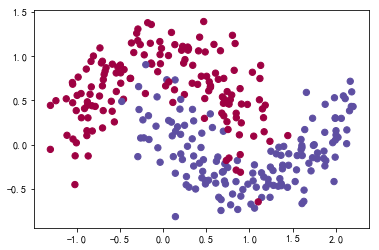

In [6]:
def load_dataset():
    np.random.seed(3)
    train_X, train_Y = sklearn.datasets.make_moons(n_samples=300, noise=.2) #300 #0.2 
    # Visualize the data
    plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral);
    train_X = train_X.T
    train_Y = train_Y.reshape((1, train_Y.shape[0]))
    return train_X, train_Y
train_X, train_Y = load_dataset()

### 构建模型

In [7]:
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s
def relu(x):
    s = np.maximum(0,x)    
    return s
def initialize_parameters(layer_dims):    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*  np.sqrt(2 / layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))        
    return parameters
def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    z1 = np.dot(W1, X) + b1
    a1 = relu(z1)
    z2 = np.dot(W2, a1) + b2
    a2 = relu(z2)
    z3 = np.dot(W3, a2) + b3
    a3 = sigmoid(z3)
    
    cache = (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3)    
    return a3, cache
def compute_cost(a3, Y):
    m = Y.shape[1]
    logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
    cost = 1./m * np.sum(logprobs)  
    return cost
def backward_propagation(X, Y, cache):
    m = X.shape[1]
    (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3) = cache
    
    dz3 = 1./m * (a3 - Y)
    dW3 = np.dot(dz3, a2.T)
    db3 = np.sum(dz3, axis=1, keepdims = True)
    
    da2 = np.dot(W3.T, dz3)
    dz2 = np.multiply(da2, np.int64(a2 > 0))
    dW2 = np.dot(dz2, a1.T)
    db2 = np.sum(dz2, axis=1, keepdims = True)
    
    da1 = np.dot(W2.T, dz2)
    dz1 = np.multiply(da1, np.int64(a1 > 0))
    dW1 = np.dot(dz1, X.T)
    db1 = np.sum(dz1, axis=1, keepdims = True)
    
    gradients = {"dz3": dz3, "dW3": dW3, "db3": db3,
                 "da2": da2, "dz2": dz2, "dW2": dW2, "db2": db2,
                 "da1": da1, "dz1": dz1, "dW1": dW1, "db1": db1}
    
    return gradients
def predict(X, y, parameters):    
    m = X.shape[1]
    p = np.zeros((1,m), dtype = np.int)
    a3, caches = forward_propagation(X, parameters)
    for i in range(0, a3.shape[1]):
        if a3[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    print("Accuracy: "  + str(np.mean((p[0,:] == y[0,:]))))  
    return p
def predict_dec(parameters, X):    
    a3, cache = forward_propagation(X, parameters)
    predictions = (a3 > 0.5)
    return predictions
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    plt.show()
def model(X, Y, layers_dims, optimizer, learning_rate = 0.0007, mini_batch_size = 64, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 10000, print_cost = True):
    L = len(layers_dims)
    costs = []                       
    t = 0                            
    seed = 10                        
    parameters = initialize_parameters(layers_dims)
    if optimizer == "gd":
        pass 
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    
    for i in range(num_epochs):
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)

        for minibatch in minibatches:
            (minibatch_X, minibatch_Y) = minibatch
            a3, caches = forward_propagation(minibatch_X, parameters)
            cost = compute_cost(a3, minibatch_Y)
            grads = backward_propagation(minibatch_X, minibatch_Y, caches)
            if optimizer == "gd":
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1
                parameters, v, s = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
        if print_cost and i % 1000 == 0:
            print ("Cost after epoch %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)

    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()
    return parameters

### mini-batch梯度下降

Cost after epoch 0: 0.690736
Cost after epoch 1000: 0.685273
Cost after epoch 2000: 0.647072
Cost after epoch 3000: 0.619525
Cost after epoch 4000: 0.576584
Cost after epoch 5000: 0.607243
Cost after epoch 6000: 0.529403
Cost after epoch 7000: 0.460768
Cost after epoch 8000: 0.465586
Cost after epoch 9000: 0.464518


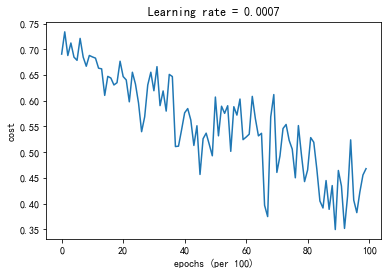

Accuracy: 0.7966666666666666


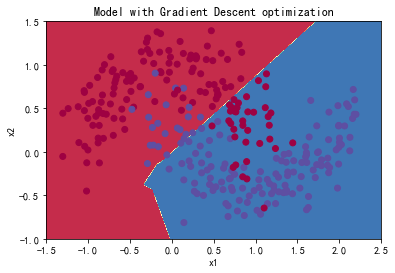

In [8]:
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "gd")
predictions = predict(train_X, train_Y, parameters)
plt.title("Model with Gradient Descent optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y.ravel())

###  Mini-batch梯度下降+momentum优化算法

Cost after epoch 0: 0.690741
Cost after epoch 1000: 0.685341
Cost after epoch 2000: 0.647145
Cost after epoch 3000: 0.619594
Cost after epoch 4000: 0.576665
Cost after epoch 5000: 0.607324
Cost after epoch 6000: 0.529476
Cost after epoch 7000: 0.460936
Cost after epoch 8000: 0.465780
Cost after epoch 9000: 0.464740


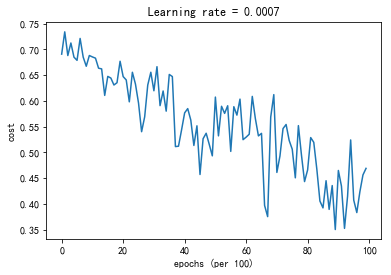

Accuracy: 0.7966666666666666


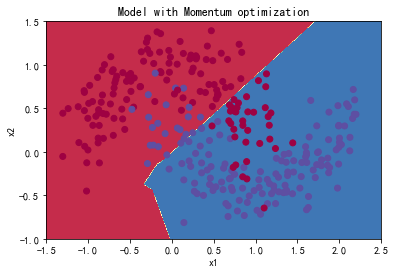

In [9]:
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, beta = 0.9, optimizer = "momentum")
predictions = predict(train_X, train_Y, parameters)
plt.title("Model with Momentum optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y.ravel())

### Mini-batch梯度下降+Adam优化算法

Cost after epoch 0: 0.690552
Cost after epoch 1000: 0.185501
Cost after epoch 2000: 0.150830
Cost after epoch 3000: 0.074454
Cost after epoch 4000: 0.125959
Cost after epoch 5000: 0.104344
Cost after epoch 6000: 0.100676
Cost after epoch 7000: 0.031652
Cost after epoch 8000: 0.111973
Cost after epoch 9000: 0.197940


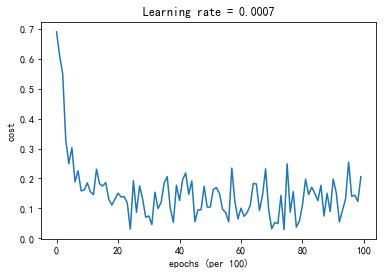

Accuracy: 0.94


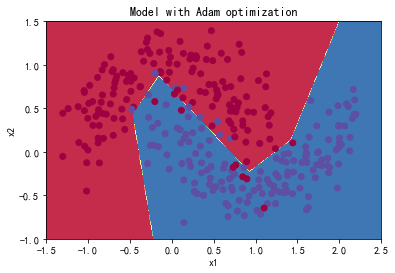

In [10]:
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "adam")
predictions = predict(train_X, train_Y, parameters)
plt.title("Model with Adam optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y.ravel())